<a href="https://colab.research.google.com/github/dibahk/Applied-Statistics/blob/main/Assignment4_Diba_Hadji_Kazemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

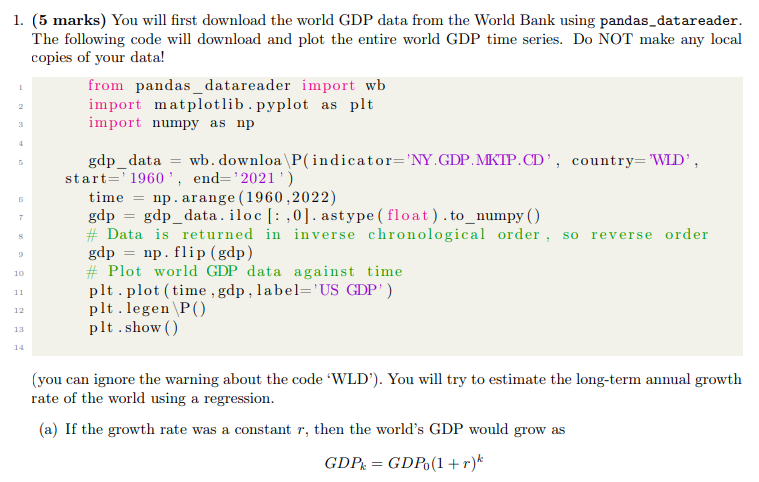

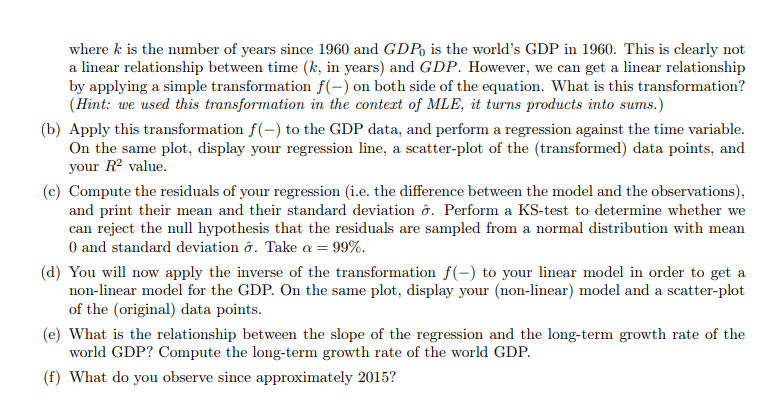

(a) the required transformation is a log(x)

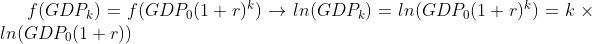

/usr/local/lib/python3.10/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


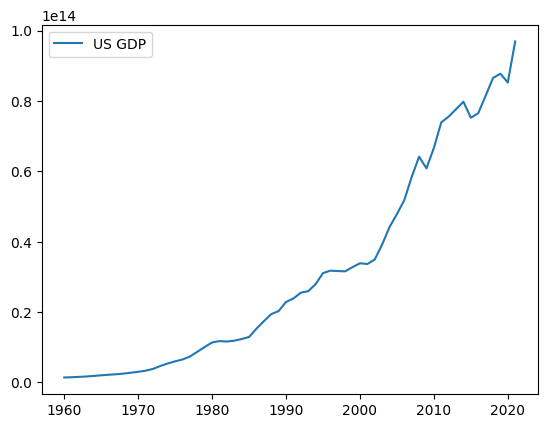

In [ ]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np
gdp_data = wb.download(indicator = 'NY.GDP.MKTP.CD', country = 'WLD', start = '1960', end = '2021')
time = np.arange(1960,2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order, se reverse order
gdp = np.flip(gdp)
# plot world GDP data against time
plt.plot(time, gdp,label='US GDP')
plt.legend()
plt.show()

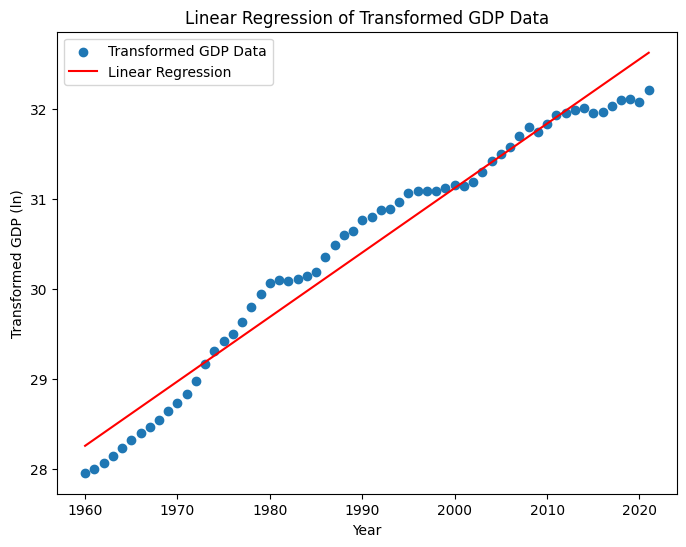

R-squared value: 0.9656784695439937


In [ ]:

from sklearn.linear_model import LinearRegression
from scipy.stats import norm, kstest
transformed_gdp = np.log(gdp)

time_reshaped = time.reshape(-1, 1)
model = LinearRegression().fit(time_reshaped, transformed_gdp)
predicted = model.predict(time_reshaped)

plt.figure(figsize=(8, 6))
plt.scatter(time, transformed_gdp, label='Transformed GDP Data')
plt.plot(time, predicted, color='red', label='Linear Regression')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Transformed GDP (ln)')
plt.title('Linear Regression of Transformed GDP Data')
plt.show()

r_squared = model.score(time_reshaped, transformed_gdp)
print(f"R-squared value: {r_squared}")



In [ ]:
# (c)
residuals = transformed_gdp - predicted
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print(f"Mean of residuals: {mean_residuals}")
print(f"Standard deviation of residuals (sigma hat): {std_residuals}")

ks_statistic, p_value = kstest(residuals, 'norm', args=(mean_residuals, std_residuals))
print('p value= {}'.format(p_value))
alpha = 0.01
if p_value < alpha:
    print("Reject null hypothesis: Residuals are not sampled from a normal distribution")
else:
    print("Cannot reject null hypothesis: Residuals may be sampled from a normal distribution")



Mean of residuals: 9.512104365820695e-15
Standard deviation of residuals (sigma hat): 0.2414462714832109
p value= 0.22115691558069928
Cannot reject null hypothesis: Residuals may be sampled from a normal distribution



since we used the logarithmic function to linearize the relationship of our data now we imply the exponential function to make it non-linear again

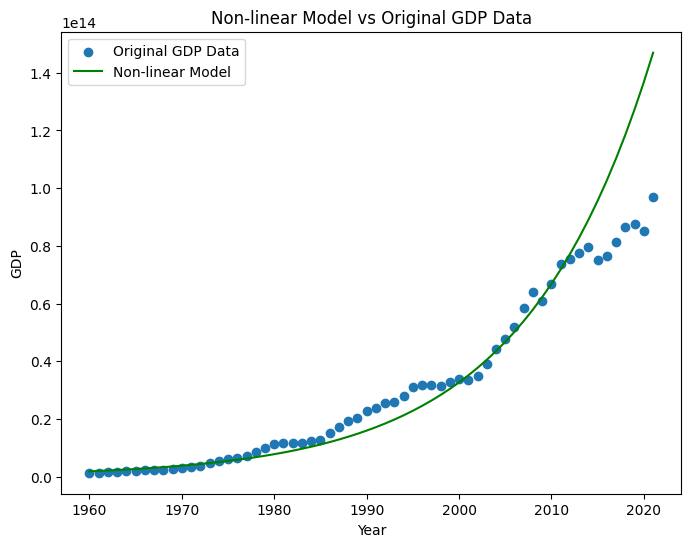

In [ ]:
# (d)

non_linear_predicted = np.exp(predicted)

plt.figure(figsize=(8, 6))
plt.scatter(time, gdp, label='Original GDP Data')
plt.plot(time, non_linear_predicted, color='green', label='Non-linear Model')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Non-linear Model vs Original GDP Data')
plt.show()



In [ ]:
# (e)
slope = model.coef_[0]
long_term_growth_rate = np.exp(slope) - 1
print(f"Long-term growth rate: {long_term_growth_rate}")

Long-term growth rate: 0.07418942390303673


In order to compute the growth rate we should apply an exponential operation to the logarithmic operation of the growth factor (1+r), which is representative of the slope, before subtracting 1.



f)

As it can be seen from the plot, the linear hypothesis is applicable to the time before 2015. After 2015 the actual data deviates from the predicted line, and the actual values were less than the predicted ones.

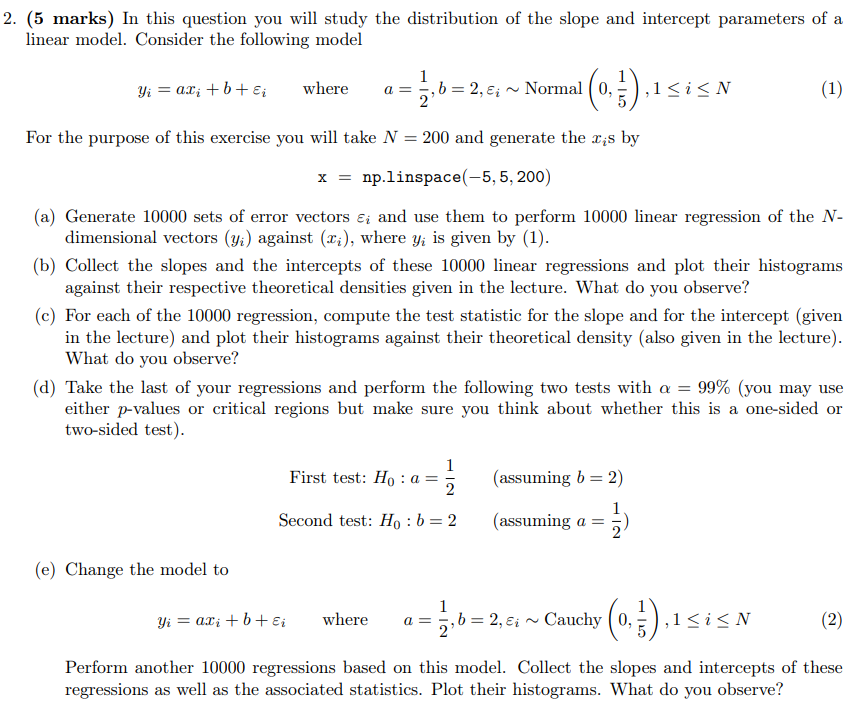

a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, cauchy
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

N = 200
a = 1 / 2
b = 2
sigma = np.sqrt(1 / 5)
x = np.linspace(-5, 5, N)

slopes = []
intercepts = []

for _ in range(10000):
    epsilon = np.random.normal(0, sigma, N)
    y = a * x + b + epsilon
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    # Store the slope and intercept
    slopes.append(model.coef_[0])
    intercepts.append(model.intercept_)



b

for finding the theretical densities of beta_1 for slope and beta_0 for the intercept the following formulas have been used

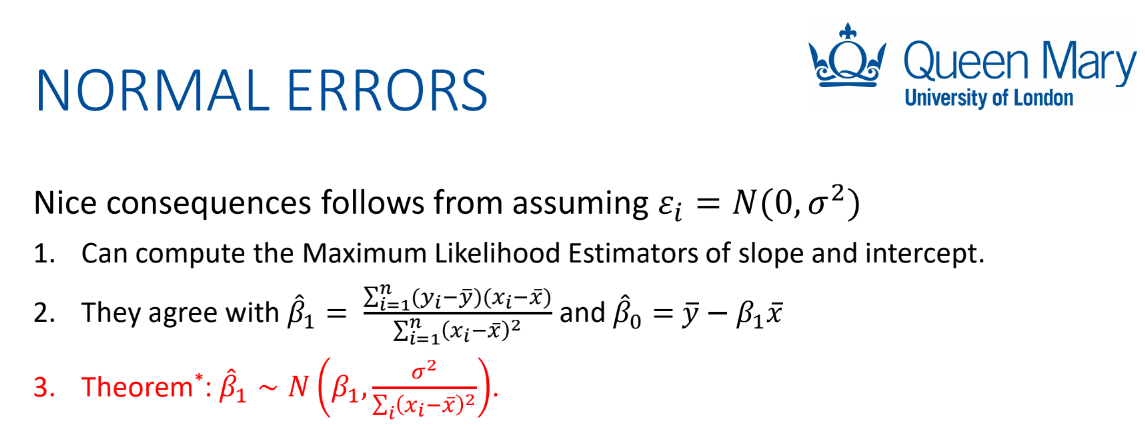

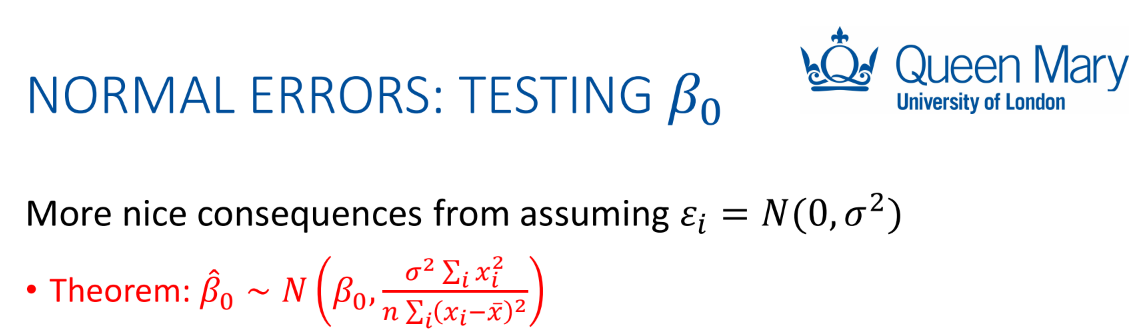

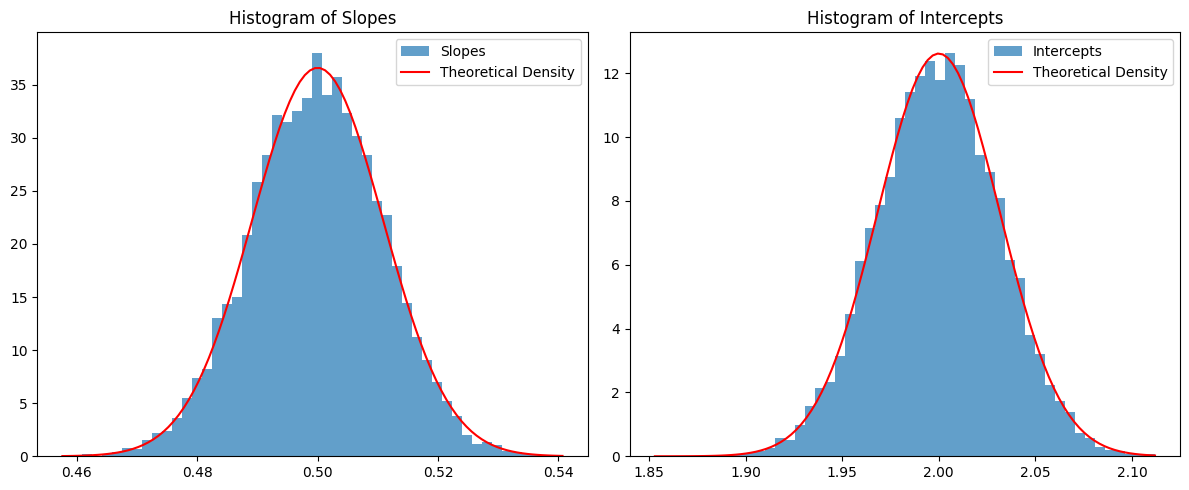

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.hist(slopes, bins=50, density=True, alpha=0.7, label='Slopes')
sc = np.sqrt(sigma**2/np.sum((x-np.mean(x))**2))
slope_density = norm(loc=a, scale=sc)
x_vals = np.linspace(min(slopes), max(slopes), 100)
plt.plot(x_vals, slope_density.pdf(x_vals), color='red', label='Theoretical Density')
plt.title('Histogram of Slopes')
plt.legend()

plt.subplot(1, 2, 2)

plt.hist(intercepts, bins=50, density=True, alpha=0.7, label='Intercepts')
sc_intercept = np.sqrt((sigma**2*np.sum(x**2)) / (N*np.sum((x - np.mean(x))**2)))
intercept_density = norm(loc=b, scale=sc_intercept)
x_vals = np.linspace(min(intercepts), max(intercepts), 100)
plt.plot(x_vals, intercept_density.pdf(x_vals), color='red', label='Theoretical Density')
plt.title('Histogram of Intercepts')
plt.legend()

plt.tight_layout()
plt.show()



since the slopes and intercepts histogram and their respective theoretical densities' plots align with each other it can be understood that ordinary least square is valid and normal error term can be assumed.

The histograms and theoretical densities show that the estimated slopes and intercepts obtained linear regressions have a lot in common with theoretical normal distributions. The alignment between the two indicates that the ordinary least squares estimator is working as expected, assuming a normal error term.

c

for beta_1 and slopes

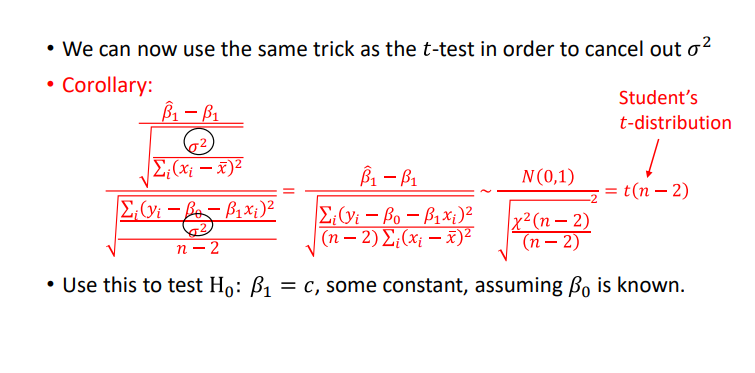

for beta_0 and inercepts

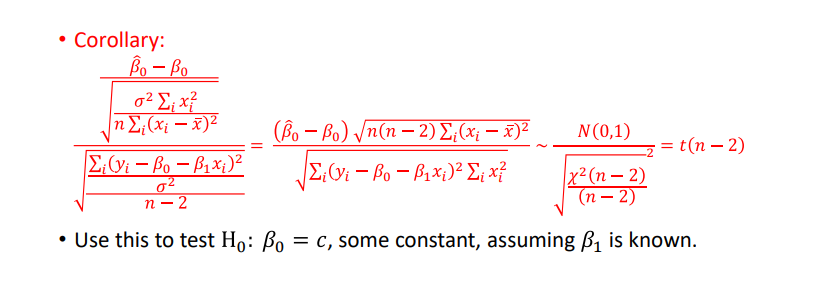

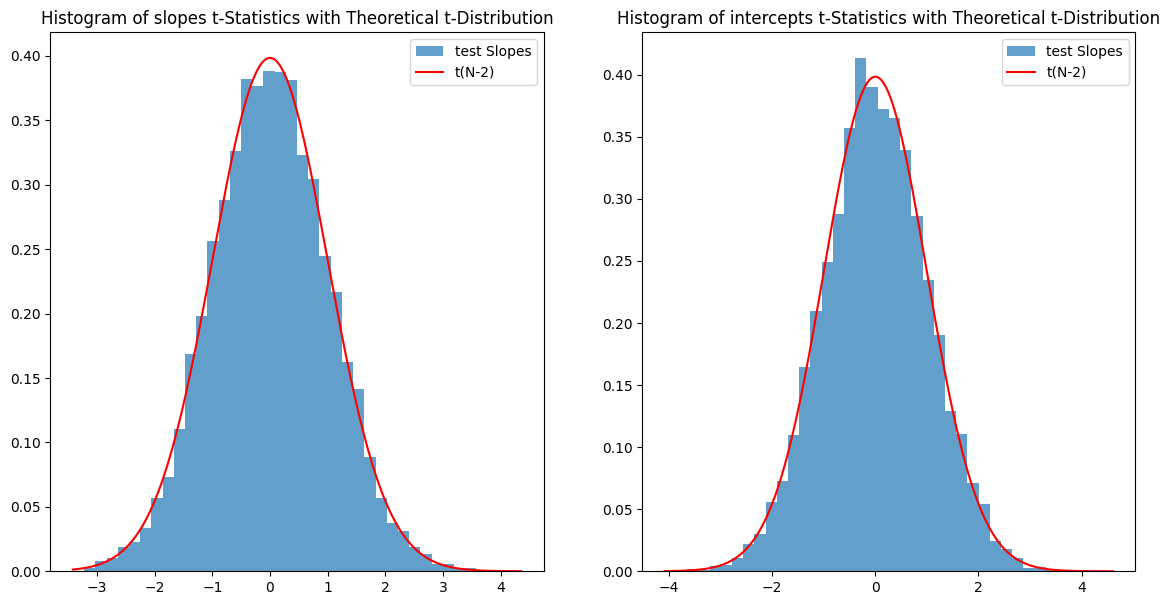

In [ ]:
from scipy.stats import t

slope_test = []
intercept_test = []
for _ in range(10000):
    epsilon = np.random.normal(0, sigma, N)
    y = a * x + b + epsilon
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    top = np.sum((y-b-a*x)**2)
    bottom = (N-2) * np.sum((x-np.mean(x))**2)
    slope_test.append((model.coef_[0]-a)/np.sqrt(top/bottom))
    num = (model.intercept_ - b) * np.sqrt(N*(N-2)*np.sum((x-np.mean(x))**2))
    den = (np.sqrt(top * np.sum(x**2)))
    intercept_test.append(num / den)


plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
x_val_slope = np.linspace(min(slope_test), max(slope_test), N)
plt.hist(slope_test, bins=40, density=True, alpha=0.7, label='test Slopes')
t_slope_density=t(df=N-2, loc=0,scale=1)
plt.plot(x_val_slope, t_slope_density.pdf(x_val_slope), 'r-', label='t(N-2)')
plt.title('Histogram of slopes t-Statistics with Theoretical t-Distribution')
plt.legend()

plt.subplot(1,2,2)
t_intercepts = np.array(intercepts)

x_val_intercept = np.linspace(min(intercept_test), max(intercept_test), N)
plt.hist(intercept_test, bins=40, density=True, alpha=0.7, label='test Slopes')
t_intercept_density = t(df=N-2, loc=0,scale=1)
plt.plot(x_val_intercept, t_intercept_density.pdf(x_val_intercept), 'r-', label='t(N-2)')
plt.title('Histogram of intercepts t-Statistics with Theoretical t-Distribution')
plt.legend()

the plots confirm the theoretical prediction that the t-statistics should conform to  t-distribution with N-2 degrees of freedom when the null hypothesis is true. This indicates that the linear regression model is correctly specified and that the assumptions that underlie the linear regression, including the normality of errors, are valid for the data generated.

d

In [ ]:
last_slope = slope_test[-1]
last_intercept = intercept_test[-1]

alpha = 0.01
# Test 1: H_0 : a = 1/2 (assuming b = 2)
slope_p_value = t.sf(abs(last_slope), df=200-2)*2
print('p-value for slope {}'.format(slope_p_value))
if slope_p_value < alpha:
    print("Reject H_0 for slope: a != 1/2")
else:
    print("Cannot reject H_0 for slope: a = 1/2")

# Test 2: H_0 : b = 2 (assuming a = 1/2)
intercept_p_value = t.sf(abs(last_intercept), df=200-2)*2
print('p-value for intercept {}'.format(intercept_p_value))
if intercept_p_value < alpha:
    print("Reject H_0 for intercept: b != 2")
else:
    print("Cannot reject H_0 for intercept: b = 2")

p-value for slope 0.5088368183946376
Cannot reject H_0 for slope: a = 1/2
p-value for intercept 0.5636729287536093
Cannot reject H_0 for intercept: b = 2


e

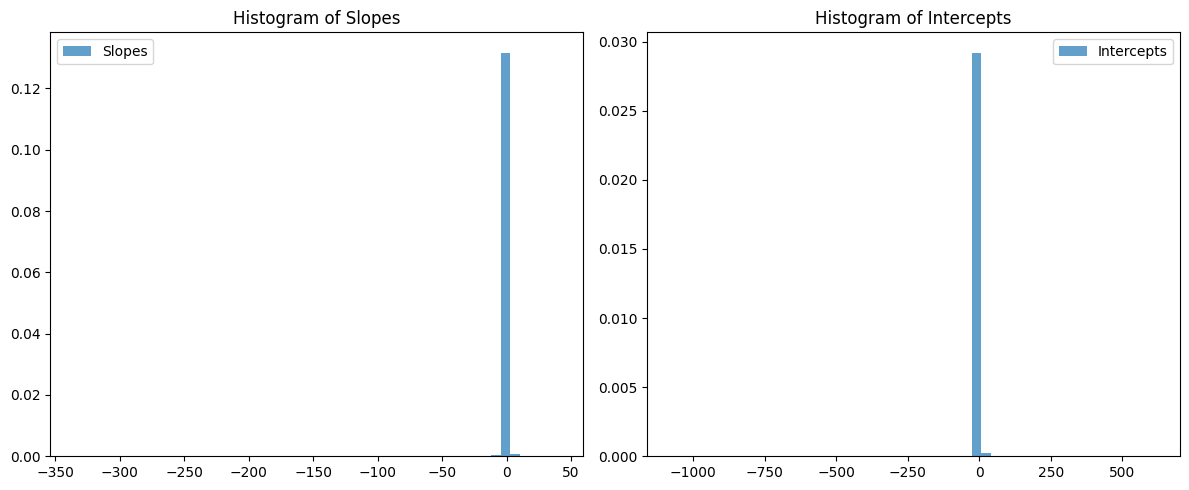

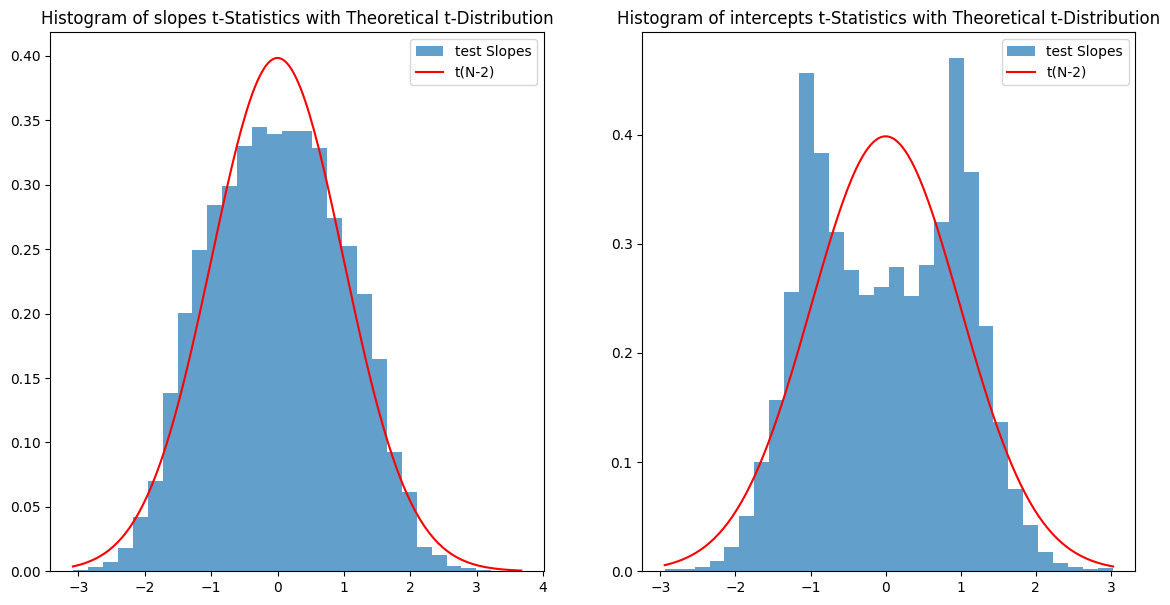

In [ ]:
slopes = []
intercepts = []
slope_test = []
intercept_test = []

for _ in range(10000):
    epsilon_cauchy = cauchy.rvs(loc=0, scale=1/5, size=N)
    y = a * x + b + epsilon_cauchy
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    slopes.append(model.coef_[0])
    intercepts.append(model.intercept_)
    top = np.sum((y-b-a*x)**2)
    bottom = (N-2) * np.sum((x-np.mean(x))**2)
    test_1 = (model.coef_[0]-a)/np.sqrt(top/bottom)
    slope_test.append(test_1)

    num = (model.intercept_ - b) * np.sqrt(N*(N-2)*np.sum((x-np.mean(x))**2))
    den = (np.sqrt(top * np.sum(x**2)))
    intercept_test.append(num / den)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, density=True, alpha=0.7, label='Slopes')


plt.title('Histogram of Slopes')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, density=True, alpha=0.7, label='Intercepts')


plt.title('Histogram of Intercepts')
plt.legend()

plt.tight_layout()
plt.show()
from scipy.stats import t
t_slopes = np.array(slopes)

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
x_val_slope = np.linspace(min(slope_test), max(slope_test), N)
plt.hist(slope_test, bins=30, density=True, alpha=0.7, label='test Slopes')
t_slope_density=t(df=N-2, loc=0,scale=1)
plt.plot(x_val_slope, t_slope_density.pdf(x_val_slope), 'r-', label='t(N-2)')
plt.title('Histogram of slopes t-Statistics with Theoretical t-Distribution')
plt.legend()

plt.subplot(1,2,2)
t_intercepts = np.array(intercepts)
x_val_intercept = np.linspace(min(intercept_test), max(intercept_test), N)
plt.hist(intercept_test, bins=30, density=True, alpha=0.7, label='test Slopes')
t_intercept_density = t(df=N-2, loc=0,scale=1)
plt.plot(x_val_intercept, t_intercept_density.pdf(x_val_intercept), 'r-', label='t(N-2)')
plt.title('Histogram of intercepts t-Statistics with Theoretical t-Distribution')
plt.legend()

the cauchy distributed error deviates a lot from the t distribution, which shows that linear regreesion isn't fit for cauchy distribution, and the significant variaion in the slope and intercept parameters shows the heavy tailed charecteristic of the cauchy distribution. additionally this variation contradicts the basic assumption of OLS regression.

The analysis of regression with Cauchy-distributed errors indicates a significant variation in the slope and intercept parameters, which is a sign of the heavy-tailed nature of this distribution. The variation contradicts the basic assumptions of OLS regression. The deviation of the histogram from the t-statistics for the slopes and intercepts show that standard linear regression is not good for distributions which are heavy-tailed like cauchy distribution.